In [1]:
from matplotlib import pyplot as plt

def show(title, img):
    plt.figure(figsize = (15,15))
    plt.title(title)
    plt.imshow(img)
    plt.show()

contours length =  1024
contours length of first item =  17
32


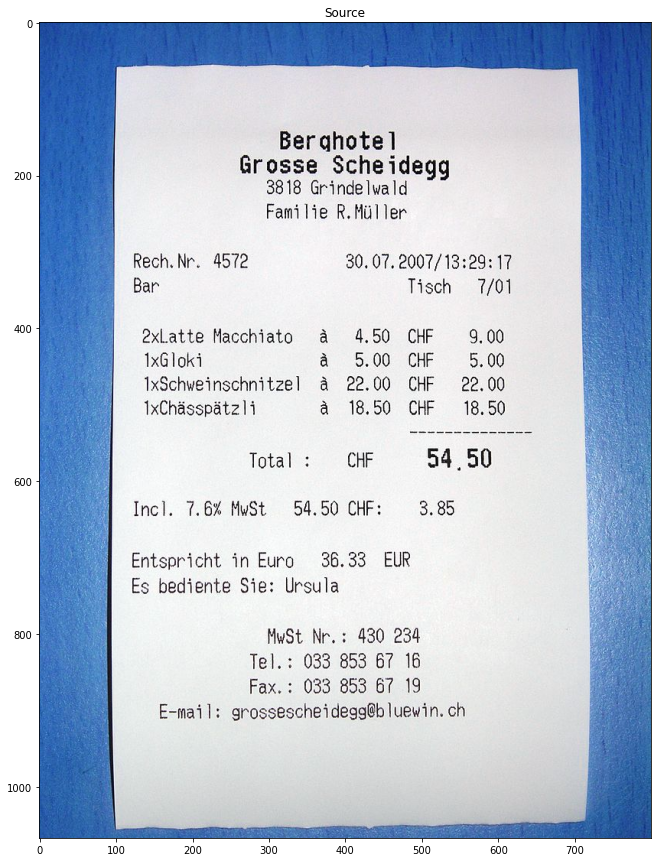

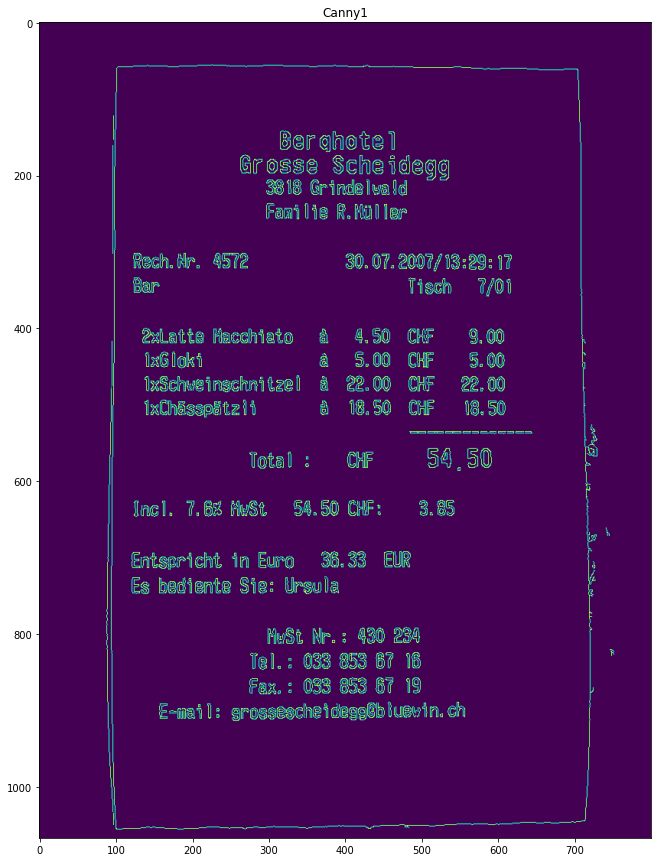

In [2]:
# https://stackoverflow.com/questions/42721213/python-opencv-extrapolating-the-largest-rectangle-off-of-a-set-of-contour-poin

import cv2
import numpy as np

def contoursConvexHull(contours):
    print("contours length = ", len(contours))
    print("contours length of first item = ", len(contours[1]))
    pts = []
    for i in range(0, len(contours)):
        for j in range(0, len(contours[i])):
            pts.append(contours[i][j])

    pts = np.array(pts)

    result = cv2.convexHull(pts)

    print(len(result))
    return result

def auto_canny(image, sigma = 0.35):
    # compute the mediam of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) *v))
    edged = cv2.Canny(image, lower, upper)

    # return edged image
    return edged


# Get our image in color mode (1)
src = cv2.imread("images/receipt_edges.jpeg", 1)

# Convert the color from BGR to Gray
srcGray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Use Gaussian Blur 
srcBlur = cv2.GaussianBlur(srcGray, (3, 3), 0)

# ret is the returned value, otsu is an image
##ret, otsu = cv2.threshold(srcBlur, 0, 255,
##                          cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Use canny
##srcCanny = cv2.Canny(srcBlur, ret, ret*2, 3)
srcCanny1 = auto_canny(srcBlur, 0.70)

# im is the output image
# contours is the contour list
# I forgot what hierarchy was
contours, hierarchy = cv2.findContours(srcCanny1,
                                           cv2.RETR_TREE,
                                           cv2.CHAIN_APPROX_SIMPLE)

##cv2.drawContours(src, contours, -1, (0, 255, 0), 3)

ConvexHullPoints = contoursConvexHull(contours)
##cv2.polylines(src, [ConvexHullPoints], True, (0, 0, 255), 3)

show("Source", src)
show("Canny1", srcCanny1)